In [1]:
from IPython import parallel
client = parallel.Client()
dv = client[:]
lb_view = client.load_balanced_view()
print len(dv)

20


In [2]:
import models


We STRONGLY recommend you to try to install mpi and mpi4py.



Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
!ls examples/images/

airplane10.jpeg    bird3.jpeg	    computer6.jpeg  frog10.jpeg   ship5.jpeg
airplane11.jpeg    bird4.jpeg	    computer7.jpeg  frog1.jpeg	  ship6.jpeg
airplane1.jpeg	   bird5.jpeg	    computer8.jpeg  frog2.jpeg	  ship9.jpeg
airplane2.jpeg	   bird6.jpeg	    computer9.jpeg  frog3.jpeg	  tiger10.jpeg
airplane3.jpeg	   bird7.jpeg	    deer10.jpeg     frog4.jpeg	  tiger1.jpeg
airplane4.jpeg	   bird8.jpeg	    deer1.jpeg	    frog6.jpeg	  tiger2.jpeg
airplane5.jpeg	   bird9.jpeg	    deer2.jpeg	    frog7.jpeg	  tiger3.jpeg
airplane6.jpeg	   cat10.jpeg	    deer3.jpeg	    frog8.jpeg	  tiger4.jpeg
airplane7.jpeg	   cat1.jpg	    deer4.jpeg	    frog9.jpeg	  tiger6.jpeg
airplane8.jpeg	   cat2.jpeg	    deer5.jpeg	    horse10.jpeg  tiger7.jpeg
airplane9.jpeg	   cat3.jpeg	    deer6.jpeg	    horse1.jpeg   tiger8.jpeg
automobile10.jpeg  cat4.jpeg	    deer7.jpeg	    horse2.jpeg   tiger9.jpeg
automobile1.jpeg   cat5.jpeg	    deer8.jpeg	    horse3.jpeg   truck10.jpeg
automobile2.jpeg   cat6.jpeg	    deer9.jpeg	

In [4]:
from glob import glob
img_files = glob("examples/images/*.jpeg")


In [18]:
decaf = models.DecafModel()
img2word = models.Image2WordModel()
word2vec = models.Word2VecModel()

In [6]:
dv.push({"decaf": decaf, "img2word": img2word}, block = True, )

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
def img2vec(imgfile):
    import matplotlib.pyplot as plt
    import models
    img = plt.imread(imgfile)
    vec = img2word.transform(decaf.transform(img))
    return vec

In [13]:
import numpy as np
imgvecs = np.array(lb_view.map_sync(img2vec, img_files))
#imgvecs = map(img2vec, img_files)

In [16]:
with open("examples/query.txt","r") as f:
    query_txt = f.readlines()
query_txt = [x.strip() for x in query_txt]

In [29]:
wordvecs = np.array([word2vec.transform(word) for word in query_txt])

In [115]:
reload(models)
embedder = models.EmbeddingModel()
X = embedder.transform(np.append(imgvecs, wordvecs, axis=0))
from sklearn.preprocessing import normalize
#imgvecs = normalize(imgvecs, )
#X = embedder.transform(imgvecs)

In [116]:
labels = map(lambda f: f.split("/")[-1], img_files)

In [117]:
labels += query_txt

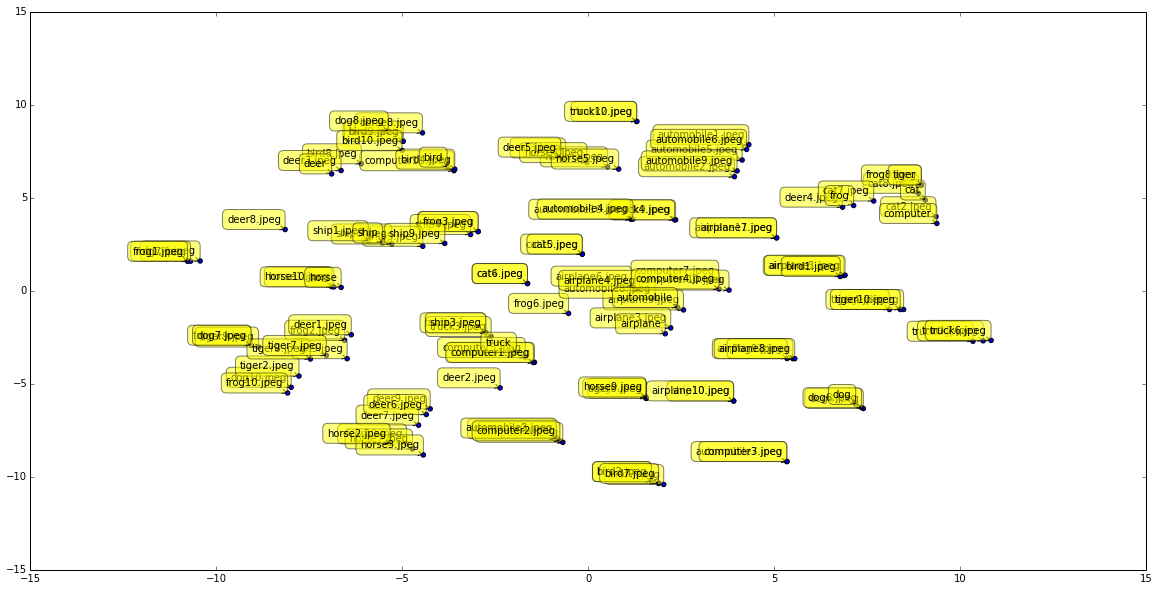

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20,10))
s = [20]*len(labels)
plt.scatter(X[:,0],X[:,1],marker = 'o',cmap = plt.get_cmap('Spectral'),s=s)
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-5, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()